In [1]:
import pandas as pd
import numpy as np 
# 시각화 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as ex
import matplotlib
import matplotlib.ticker as ticker
import re


In [2]:
# 폰트 설정
plt.rc('font', family='NanumGothic')

In [3]:
data_2021 = pd.read_csv('./KOBIS_2021.csv', encoding='cp949')
data_2021.tail()

,순위,영화명,개봉일,매출액,매출액점유율,누적매출액,관객수,누적관객수,스크린수,상영횟수,대표국적,국적,제작사,배급사,등급,장르,감독,배우
4940,4799,항거:유관순 이야기,2019-02-27,0,0.00%,"9,291,459,101",0,"1,157,953",1,3,한국,한국,(주)디씨지플러스,롯데컬처웍스(주)롯데엔터테인먼트,12세이상관람가,드라마,조민호,"고아성,김새벽,김예은,정하담,류경수,최무성,하성광,류성민,권현진,김경록,김남진,박지..."
4941,4799,해피엔드,1999-12-11,0,0.00%,"3,633,000",0,438,1,1,한국,한국,(주)명필름,NaN,18세관람가,"멜로/로맨스,스릴러",정지우,"최민식,전도연,주진모,김병춘,주현,손진호,박성일,박지일,김병춘"
4942,4799,홍길동,1967-01-21,0,0.00%,"272,000",0,68,1,2,한국,한국,세기상사㈜,NaN,NaN,"애니메이션,드라마,액션,사극",신동헌,NaN
4943,4799,황진이,1986-09-18,0,0.00%,"12,956,000",0,"6,241",1,1,한국,한국,(주)동아수출공사,NaN,국민학생관람불가,사극,배창호,"장미희,안성기,전무송,김윤경,김지영,신일룡,조주미,홍윤정"
4944,합계,NaN,NaN,"584,538,988,400",NaN,"3,226,914,677,245","60,531,087","399,788,421","149,383","4,667,070",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 합계 제거 데이터

In [4]:
data_2021 = data_2021.iloc[:-1, : ]

In [5]:
data_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4944 entries, 0 to 4943
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   순위      4944 non-null   object
 1   영화명     4944 non-null   object
 2   개봉일     3005 non-null   object
 3   매출액     4944 non-null   object
 4   매출액점유율  4944 non-null   object
 5   누적매출액   4944 non-null   object
 6   관객수     4944 non-null   object
 7   누적관객수   4944 non-null   object
 8   스크린수    4944 non-null   object
 9   상영횟수    4944 non-null   object
 10  대표국적    4912 non-null   object
 11  국적      4912 non-null   object
 12  제작사     1508 non-null   object
 13  배급사     3053 non-null   object
 14  등급      3283 non-null   object
 15  장르      4898 non-null   object
 16  감독      3814 non-null   object
 17  배우      2816 non-null   object
dtypes: object(18)
memory usage: 695.4+ KB


### 컬럼명 수정(" " 공백제거)

In [6]:
data_2021.columns = data_2021.columns.str.strip()

In [7]:
data_2021.columns.unique()

Index(['순위', '영화명', '개봉일', '매출액', '매출액점유율', '누적매출액', '관객수', '누적관객수', '스크린수',
       '상영횟수', '대표국적', '국적', '제작사', '배급사', '등급', '장르', '감독', '배우'],
      dtype='object')

In [8]:
null_list = ['대표국적', '국적', '개봉일', '제작사', '배급사', '등급', '장르', '감독', '배우']
for i in null_list:
    data_2021[i] = data_2021[i].fillna('정보없음')

In [9]:
data_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4944 entries, 0 to 4943
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   순위      4944 non-null   object
 1   영화명     4944 non-null   object
 2   개봉일     4944 non-null   object
 3   매출액     4944 non-null   object
 4   매출액점유율  4944 non-null   object
 5   누적매출액   4944 non-null   object
 6   관객수     4944 non-null   object
 7   누적관객수   4944 non-null   object
 8   스크린수    4944 non-null   object
 9   상영횟수    4944 non-null   object
 10  대표국적    4944 non-null   object
 11  국적      4944 non-null   object
 12  제작사     4944 non-null   object
 13  배급사     4944 non-null   object
 14  등급      4944 non-null   object
 15  장르      4944 non-null   object
 16  감독      4944 non-null   object
 17  배우      4944 non-null   object
dtypes: object(18)
memory usage: 695.4+ KB


### 등급 컬럼 데이터 전처리

In [10]:
# 전체관람가, 12세이상관람가, 15세이상관람가, 청소년관람불가

In [11]:
data_2021['등급'].unique()

array(['12세이상관람가', '15세이상관람가', '전체관람가', '청소년관람불가', '12세관람가',
       '15세관람가,15세이상관람가', '고등학생이상관람가,15세이상관람가',
       '15세이상관람가,18세 미만인 자는 관람할 수 없는 등급', '정보없음', '12세이상관람가,12세관람가',
       '15세이상관람가,중학생이상관람가', '18세관람가,15세이상관람가', '연소자관람불가,15세이상관람가',
       '15세관람가', '18세관람가', '12세 미만인 자는 관람할 수 없는 등급', '12세이상관람가,국민학생관람불가',
       '18세관람가,청소년관람불가', '15세 미만인 자는 관람할 수 없는 등급', '12세이상관람가,연소자관람가',
       '고등학생이상관람가', '연소자관람가,전체관람가', '연소자관람불가,청소년관람불가', '연소자관람가',
       '18세 미만인 자는 관람할 수 없는 등급', '청소년관람불가,15세이상관람가', '중학생이상관람가',
       '청소년관람불가,고등학생이상관람가', '국민학생관람불가,15세이상관람가', '연소자관람불가',
       '청소년관람불가,12세관람가', '12세이상관람가,전체관람가', '12세이상관람가,15세이상관람가', '미정',
       '12세이상관람가,국민학생관람불가,15세이상관람가', '국민학생관람불가', '12세이상관람가,15세관람가',
       '15세이상관람가,전체관람가', '기타', '미성년자관람불가', '청소년관람불가,전체관람가',
       '12세이상관람가,연소자관람가,전체관람가', '모든 관람객이 관람할 수 있는 등급'], dtype=object)

In [ ]:
data_2021['등급'] = data_2021['등급'].apply(lambda x : x.split(',')[0]) #대표 등급 설정
data_2021['등급'].unique()
2:42
def grade(x): #등급 설정 함수
    등급 = ['12세이상관람가', '15세이상관람가', '청소년관람불가', '전체관람가', '정보없음']
    if '15' in x or '중학생' in x:
        return 등급[1]
    elif '12' in x or '국민학생' in x or '연소자' in x or '미성년자' in x:
        return 등급[0]
    elif '18' in x or '청소년' in x or '고등학생' in x:
        return 등급[2]
    elif '모든' in x or '전체' in x:
        return 등급[3]
    else:
        return 등급[-1]

#### 12세이상관람가 통일

In [267]:
data_2021['등급'] = data_2021['등급'].apply(lambda x : re.sub(r'12세.*', '12세이상관람가', x))
# 중학생이상관람가' -> 12세이상관람가
data_2021['등급'] = data_2021['등급'].apply(lambda x : re.sub(r'중학생.*', '12세이상관람가', x))
# 국민학생관람불가 -> 12세이상관람가
data_2021['등급'] = data_2021['등급'].apply(lambda x : re.sub(r'국민학생관람불가.*', '12세이상관람가', x))

#### 15세이상관람가 통일

In [268]:
data_2021['등급'] = data_2021['등급'].apply(lambda x : re.sub(r'15세.*', '15세이상관람가', x))
# 고등학생이상관람가,15세이상관람가' 데이터 전처리 
data_2021['등급'] = data_2021['등급'].apply(lambda x : re.sub(r'고등학생.*', '15세이상관람가', x))

#### 청소년관람불가 통일 

In [269]:
# 18세관람가 -> 청소년관람불가 
data_2021['등급'] = data_2021['등급'].apply(lambda x : re.sub(r'18세.*', '청소년관람불가', x))
# 연소자관람불가 -> 청소년관람불가 
data_2021['등급'] = data_2021['등급'].apply(lambda x : re.sub(r'연소자관람불가.*', '청소년관람불가', x))
# 청소년관람불가,15세이상관람가 -> 청소년관람불가
data_2021['등급'] = data_2021['등급'].apply(lambda x : re.sub(r'청소년관람불가,15세이상관람가.*', '청소년관람불가', x))
# 청소년관람불가,전체관람가 -> 청소년관람불가
data_2021['등급'] = data_2021['등급'].apply(lambda x : re.sub(r'청소년관람불가,전체관람가.*', '청소년관람불가', x))
# 미성년자관람불가 -> 청소년관람불가
data_2021['등급'] = data_2021['등급'].apply(lambda x : re.sub(r'미성년자관람불가.*', '청소년관람불가', x))

#### 전체관람가 통일

In [270]:
# 모든 관광객이 관람할 수 있는 등급 -> 전체관람가
data_2021['등급'] = data_2021['등급'].apply(lambda x : re.sub(r'모든.*', '전체관람가', x))
# 연소자관람가 -> 전체관람가
data_2021['등급'] = data_2021['등급'].apply(lambda x : re.sub(r'연소자관람가.*', '전체관람가', x))
# 연소자관람가 -> 전체관람가
data_2021['등급'] = data_2021['등급'].apply(lambda x : re.sub(r'연소자관람가.*', '전체관람가', x))
# 전체관람가,12세이상관람가 -> 전체관람가
data_2021['등급'] = data_2021['등급'].apply(lambda x : re.sub(r'전체관람가,12세이상관람가.*', '전체관람가', x))
# 청소년관람불가,12세이상관람가 -> 전체관람가
data_2021['등급'] = data_2021['등급'].apply(lambda x : re.sub(r'청소년관람불가,12세이상관람가.*', '청소년관람불가', x))

#### 정보없음 통일

In [271]:
# 미정 -> 정보없음
data_2021['등급'] = data_2021['등급'].apply(lambda x : re.sub(r'미정.*', '정보없음', x))
# 기타 -> 정보없음
data_2021['등급'] = data_2021['등급'].apply(lambda x : re.sub(r'기타.*', '정보없음', x))

In [272]:
data_2021['등급'].unique()

array(['12세이상관람가', '15세이상관람가', '전체관람가', '청소년관람불가', '정보없음'], dtype=object)

## 장르 컬럼 데이터 전처리

In [273]:
data_2021['장르'].unique()

array(['액션,어드벤처,SF', '액션,드라마', '액션,어드벤처,드라마', '액션', '코미디', '애니메이션',
       '액션,SF,스릴러', '드라마,범죄,코미디', '액션,어드벤처,판타지', '액션,스릴러', 'SF', '범죄,액션',
       '드라마', '스릴러,액션', '애니메이션,코미디,어드벤처', '스릴러', '공포(호러),스릴러,드라마',
       '판타지,액션', '공포(호러),미스터리,스릴러', '멜로/로맨스,코미디', '드라마,코미디', '코미디,액션',
       '액션,어드벤처,판타지,미스터리,SF', '드라마,멜로/로맨스', '드라마,액션', '액션,코미디,범죄',
       '애니메이션,어드벤처,코미디', '사극,드라마', '미스터리,스릴러', '애니메이션,액션,어드벤처', '액션,어드벤처',
       '액션,공포(호러),스릴러', '액션,SF', '어드벤처', '범죄', '액션,코미디', '공포(호러),스릴러',
       '멜로/로맨스,드라마', '어드벤처,미스터리,액션', '애니메이션,코미디,가족', '뮤지컬,드라마',
       '미스터리,공포(호러)', '미스터리,스릴러,공포(호러)', '코미디,드라마,멜로/로맨스', '액션,범죄,드라마',
       '코미디,드라마,SF', '액션,판타지', '애니메이션,어드벤처,드라마', '애니메이션,어드벤처', '가족,판타지',
       '애니메이션,드라마,멜로/로맨스', '범죄,스릴러', '공포(호러),스릴러,미스터리', '드라마,뮤지컬,멜로/로맨스',
       '스릴러,드라마', '스릴러,미스터리', '코미디,멜로/로맨스', '멜로/로맨스', 'SF,미스터리,멜로/로맨스',
       '다큐멘터리', '애니메이션,공연', '공포(호러)', '드라마,범죄', '애니메이션,액션,판타지',
       '애니메이션,판타지,어드벤처', '어드벤처,드라마,판타지', '판타지,어드벤처', '드라마,스릴러',
       '애니메이션,판타지', '범죄,

In [274]:
data_2021['장르'] = data_2021['장르'].apply(lambda x: x.split(',')[0])

In [275]:
data_2021['등급'].value_counts()

정보없음        1669
청소년관람불가     1513
15세이상관람가     788
12세이상관람가     600
전체관람가        374
Name: 등급, dtype: int64

In [276]:
data_2021['장르'].unique()

array(['액션', '코미디', '애니메이션', '드라마', 'SF', '범죄', '스릴러', '공포(호러)', '판타지',
       '멜로/로맨스', '사극', '미스터리', '어드벤처', '뮤지컬', '가족', '다큐멘터리', '기타', '공연',
       '서부극(웨스턴)', '전쟁', '성인물(에로)', '정보없음'], dtype=object)

## 개봉일 컬럼 전처리

In [277]:
data_2021['개봉일'] = data_2021['개봉일'].astype(str).apply(lambda x: x.split(' ')[0])

In [278]:
data_2021['개봉일 연도'] = data_2021['개봉일'].astype(str).apply(lambda x: x.split('-')[0])

In [297]:
# 모두 object 인수 확인
data_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4944 entries, 0 to 4943
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   순위      4944 non-null   object
 1   영화명     4944 non-null   object
 2   개봉일     4944 non-null   object
 3   매출액     4944 non-null   Int64 
 4   매출액점유율  4944 non-null   object
 5   누적매출액   4944 non-null   Int64 
 6   관객수     4944 non-null   Int64 
 7   누적관객수   4944 non-null   Int64 
 8   스크린수    4944 non-null   Int64 
 9   상영횟수    4944 non-null   Int64 
 10  대표국적    4944 non-null   object
 11  국적      4944 non-null   object
 12  제작사     4944 non-null   object
 13  배급사     4944 non-null   object
 14  등급      4944 non-null   object
 15  대표장르    4944 non-null   object
 16  감독      4944 non-null   object
 17  배우      4944 non-null   object
 18  개봉일 연도  4944 non-null   object
dtypes: Int64(6), object(13)
memory usage: 763.0+ KB


### 장르 -> 대표장르로 변경

In [296]:
data_2021.rename(columns={'장르':'대표장르'}, inplace=True)

#### 쉼표 제거

In [280]:
objectToint = ['매출액','누적매출액', '관객수', '누적관객수', '스크린수', '상영횟수']
for i in objectToint:
    data_2021[i] = data_2021[i].str.replace(',', '')

#### int로 변환

In [281]:
# '매출액', '매출액점유율', '누적매출액', '관객수', '누적관객수', '스크린수', '상영횟수' 열의 데이터 타입을 int로 변환
data_2021['매출액'] = data_2021['매출액'].astype('Int64')
data_2021['누적매출액'] = data_2021['누적매출액'].astype('Int64')
data_2021['관객수'] = data_2021['관객수'].astype('Int64')
data_2021['누적관객수'] = data_2021['누적관객수'].astype('Int64')
data_2021['스크린수'] = data_2021['스크린수'].astype('Int64')
data_2021['상영횟수'] = data_2021['상영횟수'].astype('Int64')

In [308]:
# # 매출액점유율 % -> " "
# data_2021['매출액점유율'] = data_2021['매출액점유율'].str.replace('%', '').astype(float)

AttributeError: Can only use .str accessor with string values!

In [282]:
df_2021 = data_2021[['영화명', '개봉일', '매출액', '매출액점유율', '누적매출액', '관객수', '누적관객수', '스크린수', '대표국적', '등급', '장르']]
df_2021.head()

,영화명,개봉일,매출액,매출액점유율,누적매출액,관객수,누적관객수,스크린수,대표국적,등급,장르
0,스파이더맨: 노 웨이 홈,2021-12-15,55697413760,9.50%,55697413760,5560940,5560940,2948,미국,12세이상관람가,액션
1,모가디슈,2021-07-28,34558297730,5.90%,34558297730,3613984,3613984,1688,한국,15세이상관람가,액션
2,이터널스,2021-11-03,31729284450,5.40%,31729284450,3050132,3050132,2648,미국,12세이상관람가,액션
3,블랙 위도우,2021-07-07,29996075620,5.10%,29996075620,2962088,2962088,2528,미국,12세이상관람가,액션
4,분노의 질주: 더 얼티메이트,2021-05-19,22059658060,3.80%,22059658060,2292415,2292415,2297,미국,12세이상관람가,액션


In [288]:
data_2021['등급'].value_counts()

정보없음        1669
청소년관람불가     1513
15세이상관람가     788
12세이상관람가     600
전체관람가        374
Name: 등급, dtype: int64

In [289]:
data_2021['장르'].value_counts()

드라마         1355
멜로/로맨스       958
기타           581
다큐멘터리        304
성인물(에로)      282
액션           273
코미디          226
애니메이션        195
공포(호러)       121
범죄           105
스릴러           84
어드벤처          55
공연            54
서부극(웨스턴)      51
SF            48
정보없음          46
전쟁            45
미스터리          43
판타지           37
가족            31
사극            27
뮤지컬           23
Name: 장르, dtype: int64

In [285]:
df_2021

,영화명,개봉일,매출액,매출액점유율,누적매출액,관객수,누적관객수,스크린수,대표국적,등급,장르
0,스파이더맨: 노 웨이 홈,2021-12-15,55697413760,9.50%,55697413760,5560940,5560940,2948,미국,12세이상관람가,액션
1,모가디슈,2021-07-28,34558297730,5.90%,34558297730,3613984,3613984,1688,한국,15세이상관람가,액션
2,이터널스,2021-11-03,31729284450,5.40%,31729284450,3050132,3050132,2648,미국,12세이상관람가,액션
3,블랙 위도우,2021-07-07,29996075620,5.10%,29996075620,2962088,2962088,2528,미국,12세이상관람가,액션
4,분노의 질주: 더 얼티메이트,2021-05-19,22059658060,3.80%,22059658060,2292415,2292415,2297,미국,12세이상관람가,액션
...,...,...,...,...,...,...,...,...,...,...,...
4939,함바,정보없음,0,0.00%,0,0,0,1,한국,정보없음,다큐멘터리
4940,항거:유관순 이야기,2019-02-27,0,0.00%,9291459101,0,1157953,1,한국,12세이상관람가,드라마
4941,해피엔드,1999-12-11,0,0.00%,3633000,0,438,1,한국,청소년관람불가,멜로/로맨스
4942,홍길동,1967-01-21,0,0.00%,272000,0,68,1,한국,정보없음,애니메이션


### 2021년 매출액 top 10 

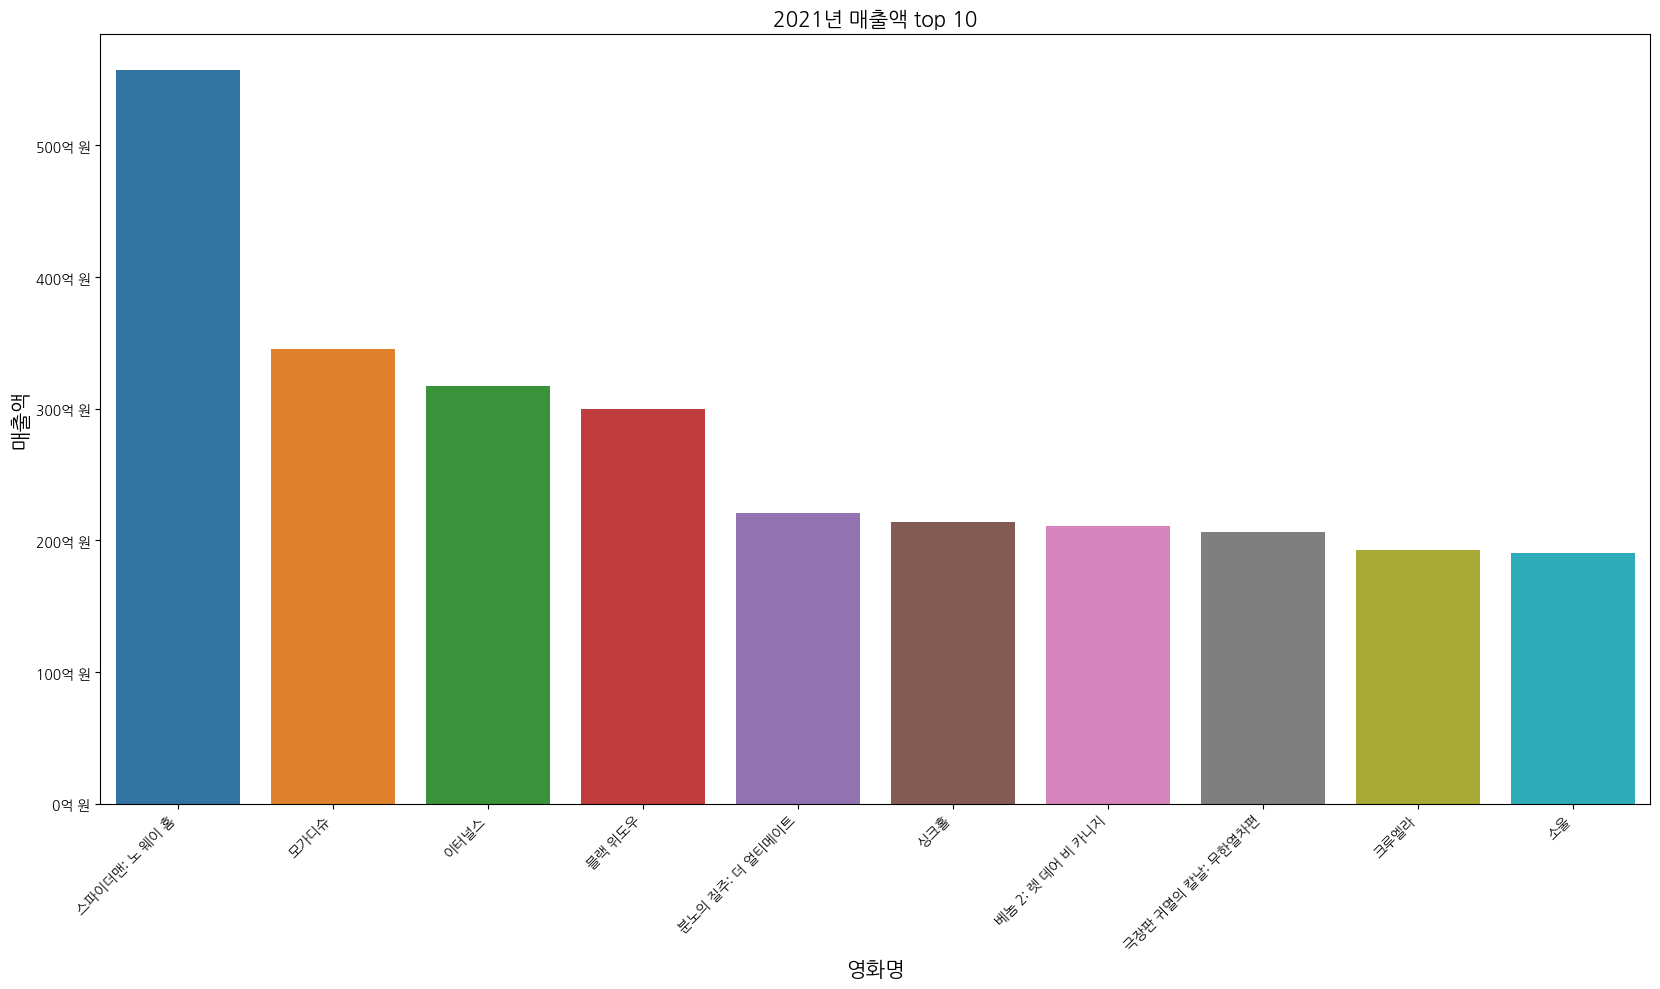

In [301]:
sales_top10 = data_2021[['영화명', '매출액']].sort_values(by='매출액', ascending=False).head(10)
plt.figure(figsize=(20, 10))
ax = sns.barplot(data=sales_top10, x='영화명', y='매출액')
# 축의 눈금 표시 방식 조정
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e8:.0f}억 원'))
# x축 눈금 회전
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.title('2021년 매출액 top 10', fontsize=15)
plt.xlabel('영화명', fontsize=15)
plt.ylabel('매출액', fontsize=15)
plt.show();

### 2021년 매출액 점유율 top 10 

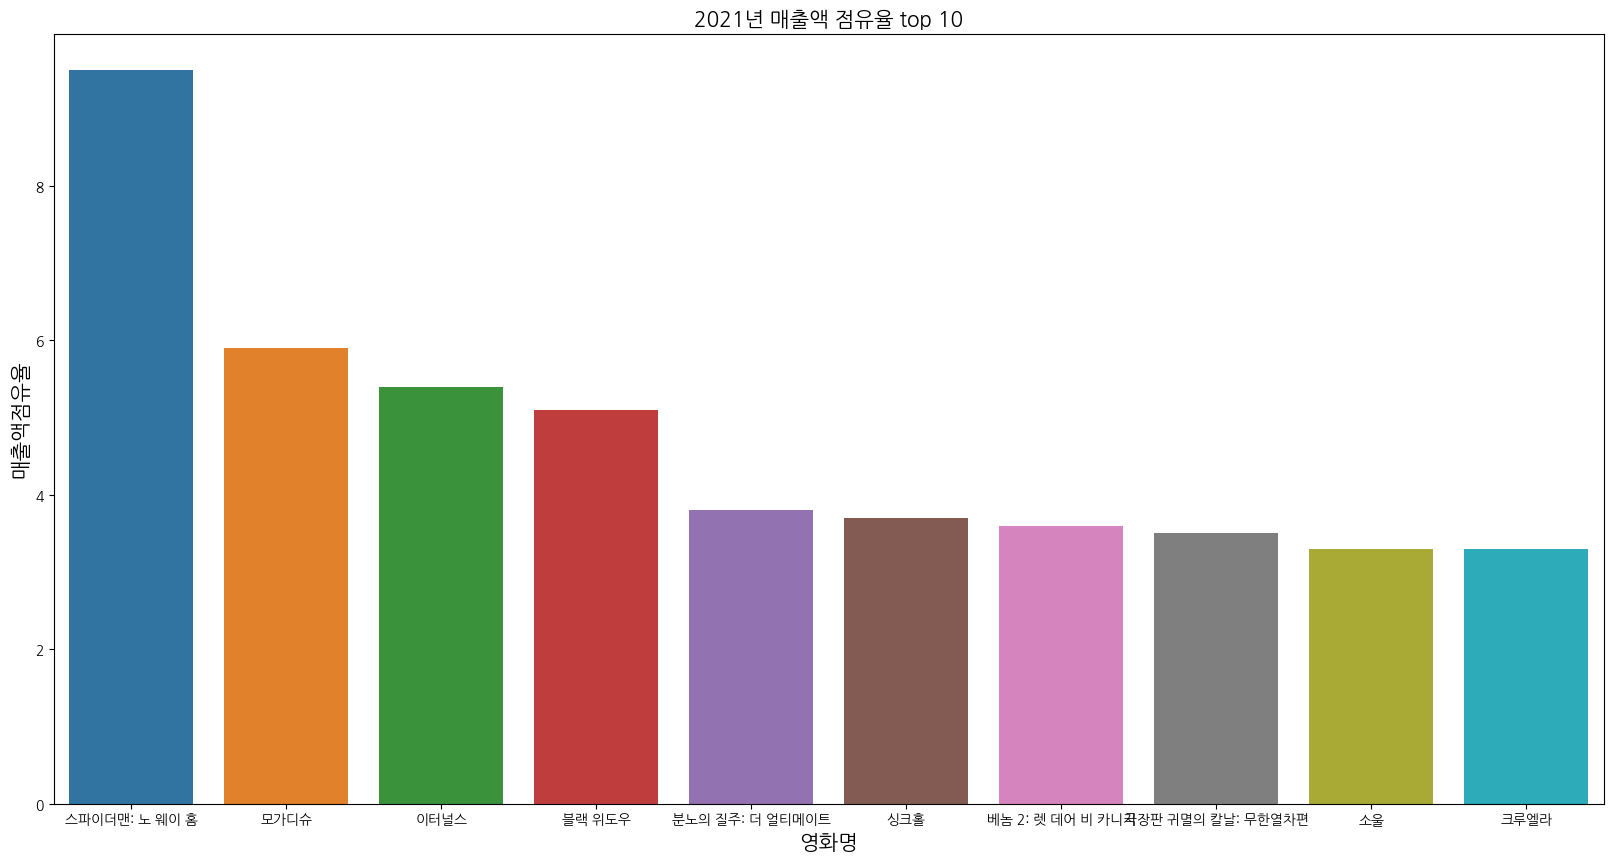

In [309]:
sales_top10 = data_2021[['영화명', '매출액점유율']].sort_values(by='매출액점유율', ascending=False).head(10)
plt.figure(figsize=(20, 10))
ax = sns.barplot(data=sales_top10, x='영화명', y='매출액점유율')
plt.title('2021년 매출액 점유율 top 10', fontsize=15)
plt.xlabel('영화명', fontsize=15)
plt.ylabel('매출액점유율', fontsize=15)
plt.show();

In [ ]:
count_genre_top10 = data_2021[['영화명', '매출액점유율']].sort_values(by='매출액점유율', ascending=False).head(10)
plt.figure(figsize=(20, 10))
ax = sns.barplot(data=sales_top10, x='영화명', y='매출액점유율')
plt.title('2021년 매출액 점유율 top 10', fontsize=15)
plt.xlabel('영화명', fontsize=15)
plt.ylabel('매출액점유율', fontsize=15)
plt.show();

### 범주형 분석

In [313]:
df21_cate = data_2021[['대표장르', '대표국적', '등급', '개봉일 연도']]

In [325]:
def sorted_category(column_name):
    # 대표장르별 개봉 영화 수 계산
    counts = df21_cate[column_name].value_counts()
    # 대표장르를 count 값에 따라 정렬
    sorted = counts.index.sort_values(ascending=False)
    return sorted

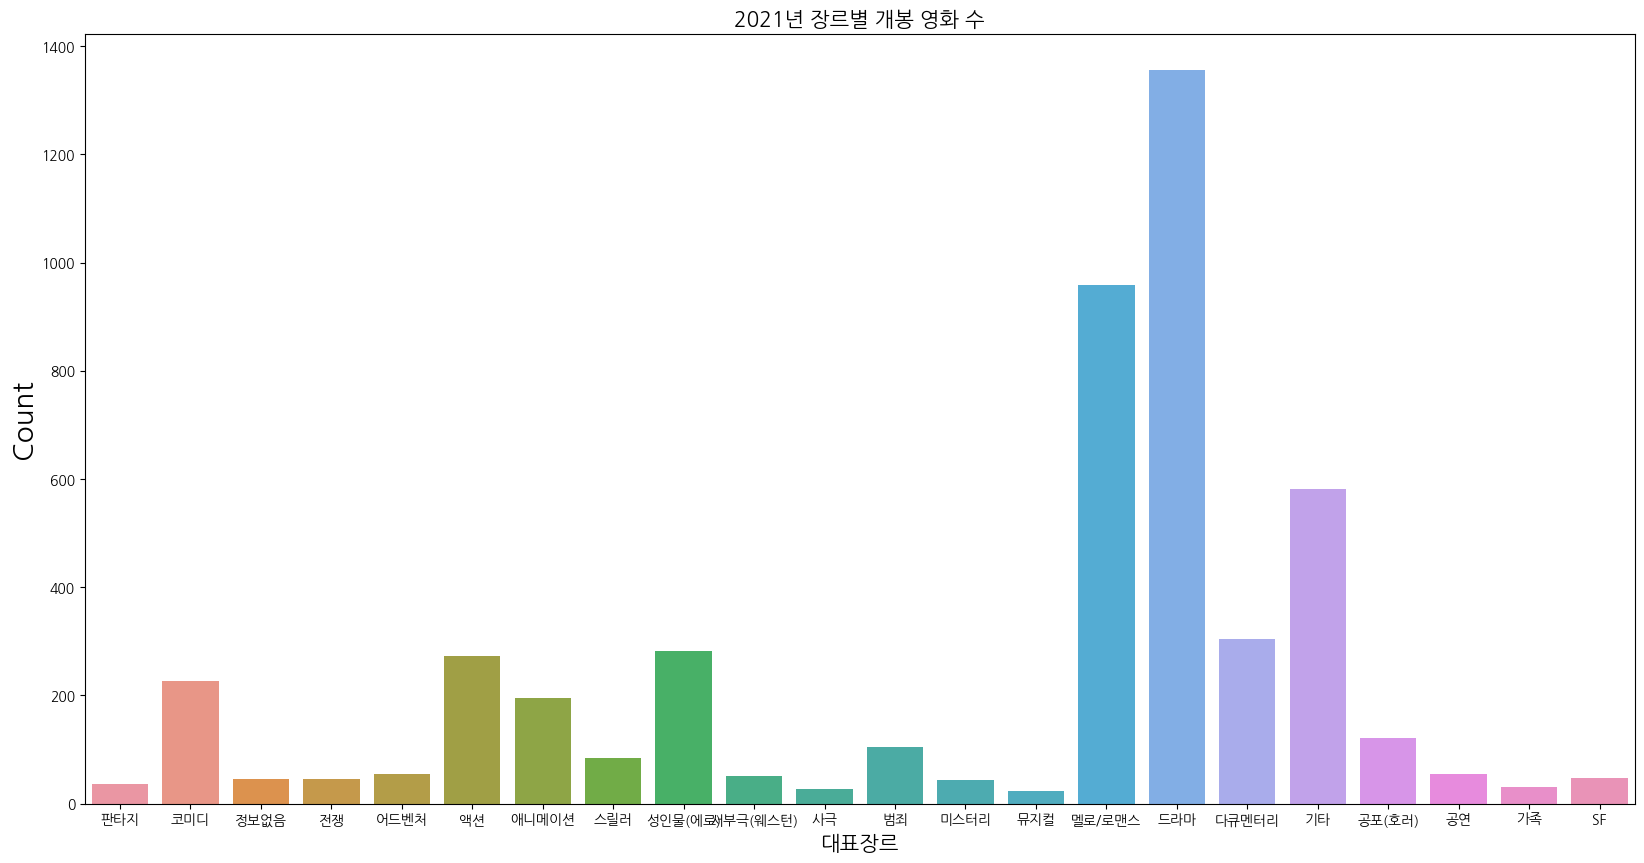

In [329]:
sorted_category('대표장르')
plt.figure(figsize=(20,10))
sns.countplot(data = df21_cate, x='대표장르', order=sorted_category('대표장르'))
plt.title('2021년 장르별 개봉 영화 수', fontsize=15)
plt.xlabel('대표장르', fontsize=15)
plt.ylabel('Count', fontsize=20)
plt.show();

In [339]:
country_counts = df21_cate['대표국적'].value_counts().head(5)
# 대표장르를 count 값에 따라 정렬
country_sorted = country_counts.index.sort_values(ascending=False)
country_counts, country_sorted

(한국     1791
 미국     1054
 일본      833
 프랑스     252
 기타      217
 Name: 대표국적, dtype: int64,
 Index(['한국', '프랑스', '일본', '미국', '기타'], dtype='object'))

In [249]:
df21_cate2 = data_2021[['개봉일 연도', '관객수', '누적관객수', '매출액', '매출액점유율', '누적매출액']]
df21_cate2 = df21_cate2[df21_cate2['개봉일 연도']!='정보없음']

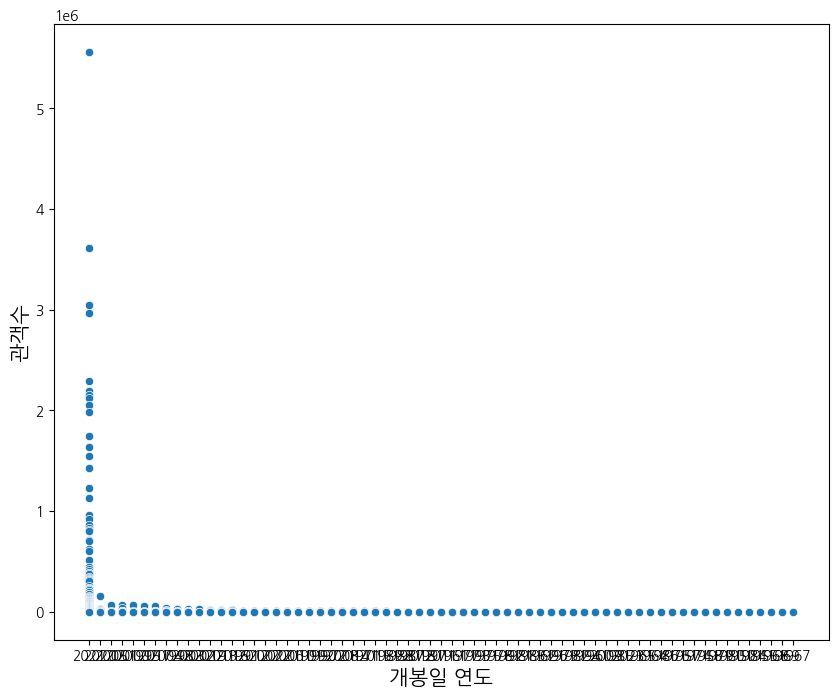

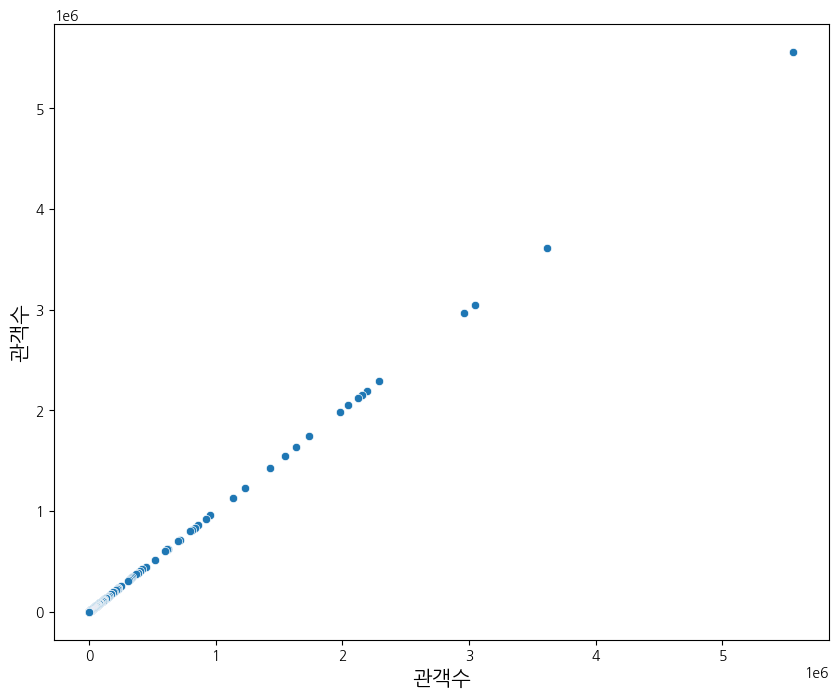

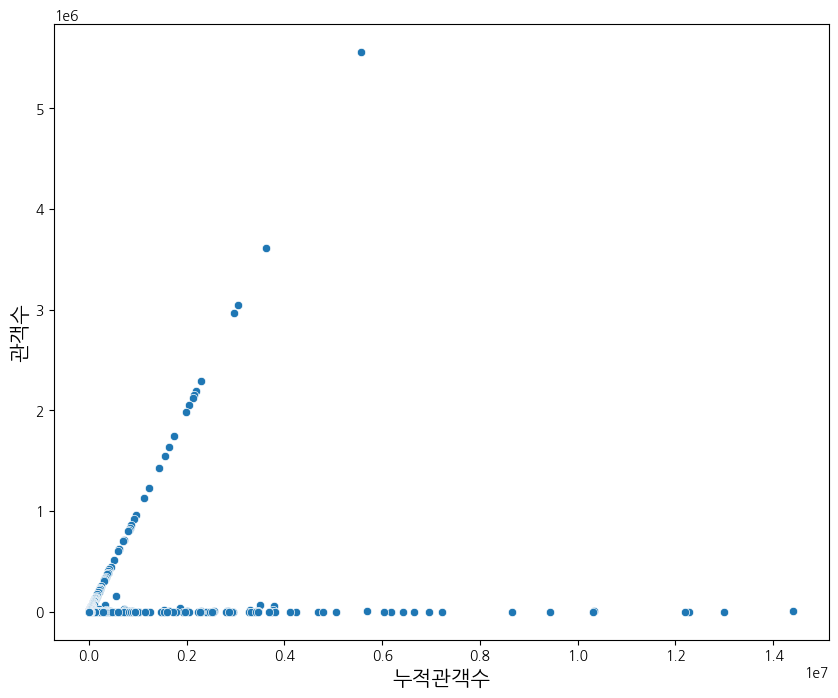

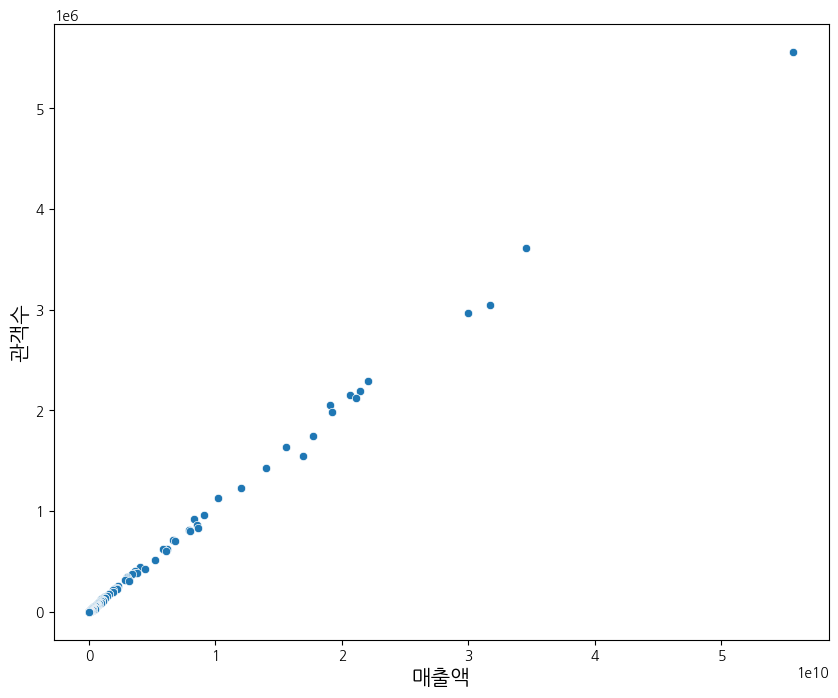

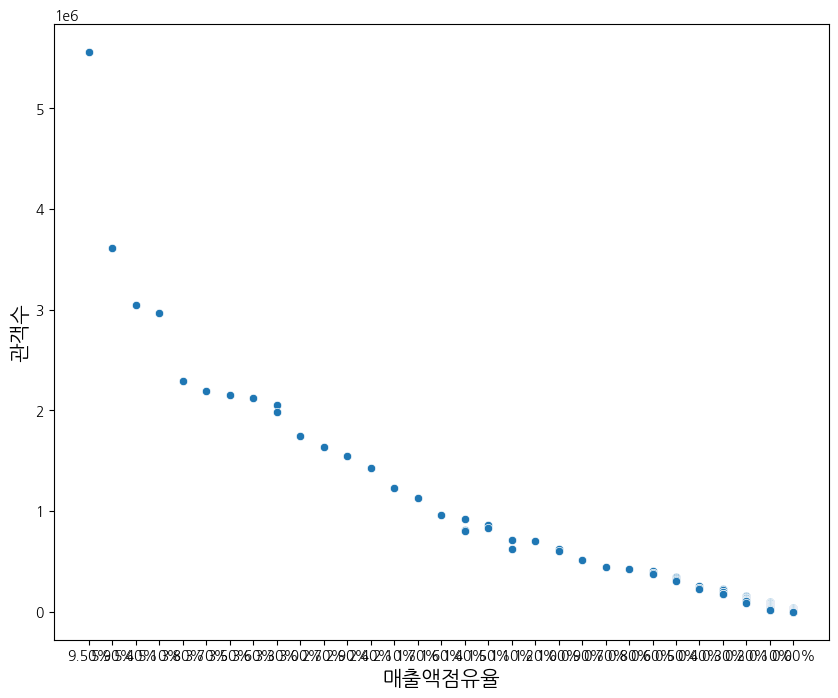

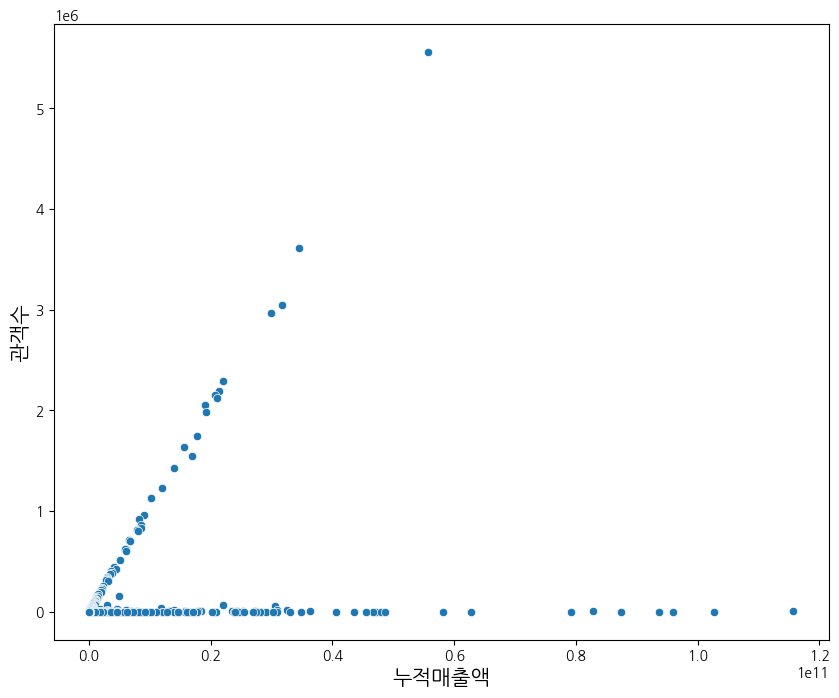

In [253]:
for col in df21_cate2.columns:
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=col, y='관객수', data=df21_cate2)
    plt.xlabel(col, fontsize=15)
    plt.ylabel('관객수', fontsize=15)
    plt.show()

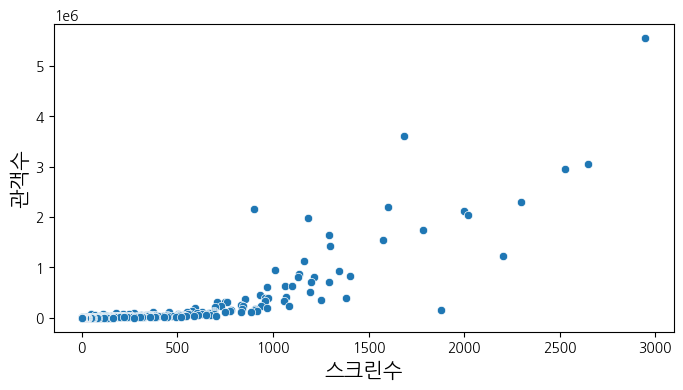

In [251]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='스크린수',y='관객수', data=data_2021)
plt.xlabel('스크린수', fontsize=15)
plt.ylabel('관객수', fontsize=15)
plt.show()

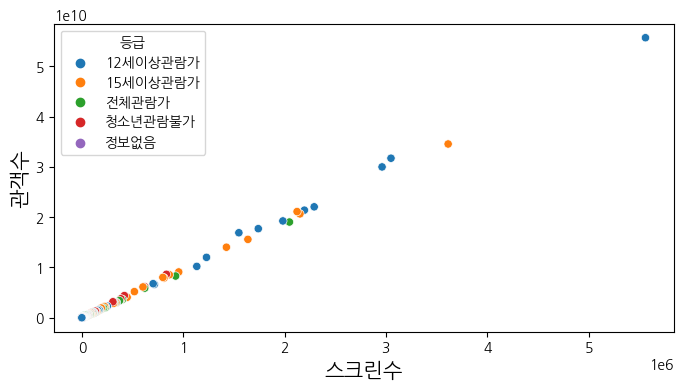

In [344]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='관객수',y='매출액', data=data_2021, hue='등급')
plt.xlabel('스크린수', fontsize=15)
plt.ylabel('관객수', fontsize=15)
plt.show()